In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/My Drive/models/sales_data.csv"

In [ ]:
sales = pd.read_csv(path, parse_dates=["Date"])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.shape

(113036, 18)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## Numerical analysis and visualization

In [ ]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales.Unit_Cost.mean()

267.296365759581

In [ ]:
sales.Unit_Cost.median()

9.0

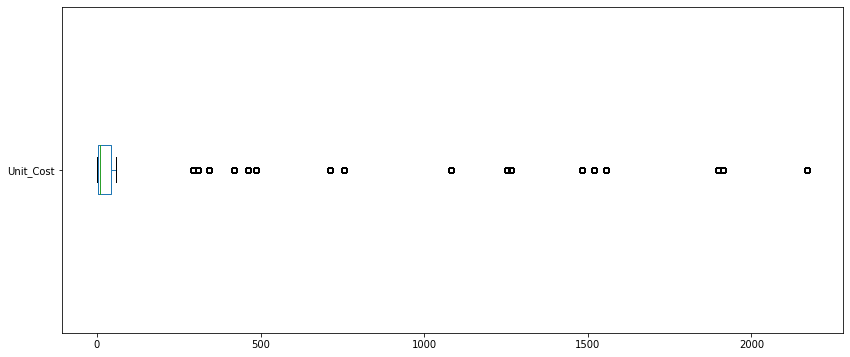

In [ ]:
sales.Unit_Cost.plot(kind="box", vert=False, figsize=(14, 6))

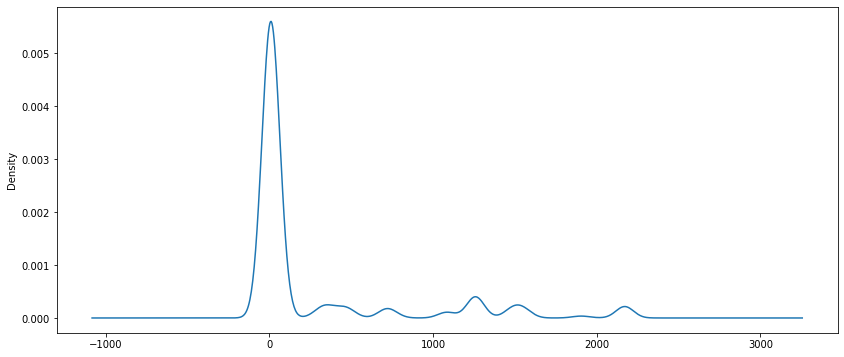

In [ ]:
sales.Unit_Cost.plot(kind="density", figsize=(14, 6))

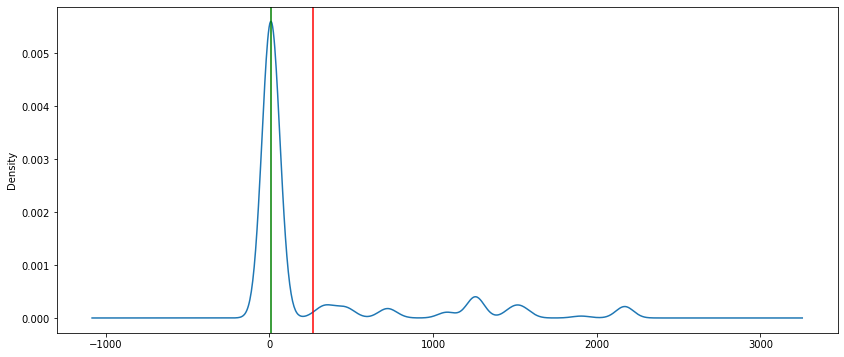

In [ ]:
ax = sales.Unit_Cost.plot(kind="density", figsize=(14, 6))
ax.axvline(sales.Unit_Cost.mean(), color="red")
ax.axvline(sales.Unit_Cost.median(), color="green")

Text(0.5, 0, 'dollars')

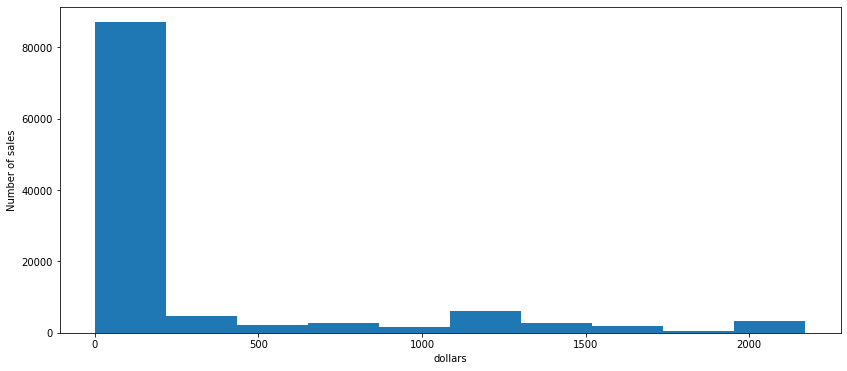

In [ ]:
ax = sales.Unit_Cost.plot(kind="hist", figsize=(14, 6))
ax.set_ylabel("Number of sales")
ax.set_xlabel("dollars")

## Categorical Analysis and visualization


we will use Age_group column

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.Age_Group.value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

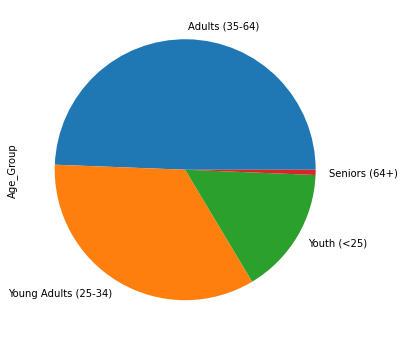

In [ ]:
sales.Age_Group.value_counts().plot(kind="pie", figsize=(6,6))

Text(0, 0.5, 'Number of sales')

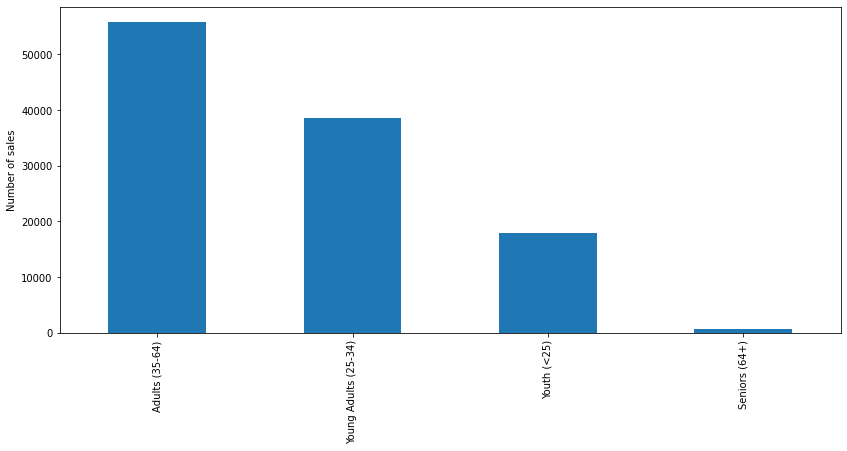

In [ ]:
ax = sales.Age_Group.value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of sales")

In [ ]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x7f44dc681908>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue')])

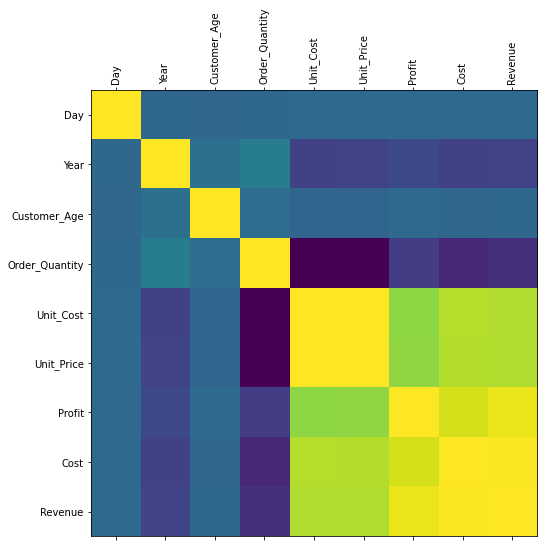

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

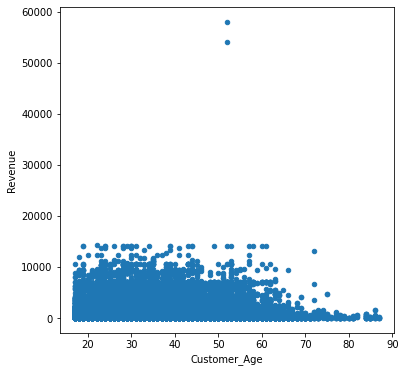

In [ ]:
sales.plot(kind="scatter", x="Customer_Age", y="Revenue", figsize=(6,6))

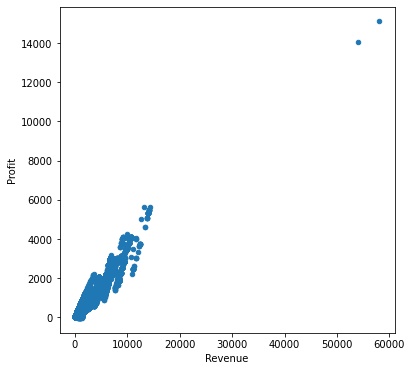

In [ ]:
sales.plot(kind="scatter", x="Revenue", y="Profit", figsize=(6,6))

Text(0, 0.5, 'Profit')

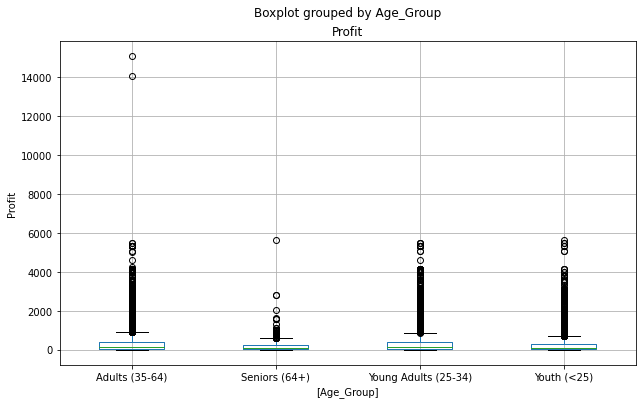

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

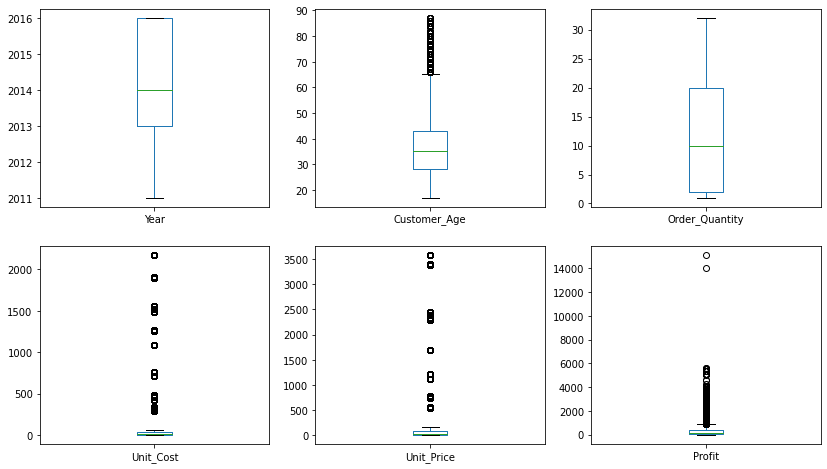

In [ ]:
boxplot_cols = ["Year", "Customer_Age", "Order_Quantity", "Unit_Cost","Unit_Price", "Profit"]
sales[boxplot_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14, 8))

# Column Wrangling

we can also create new columns or modify existing ones

**Add and calculate a new Revenue_per_Age column**

In [ ]:
sales['Revenue_per_Age'] = sales.Revenue / sales.Customer_Age
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617


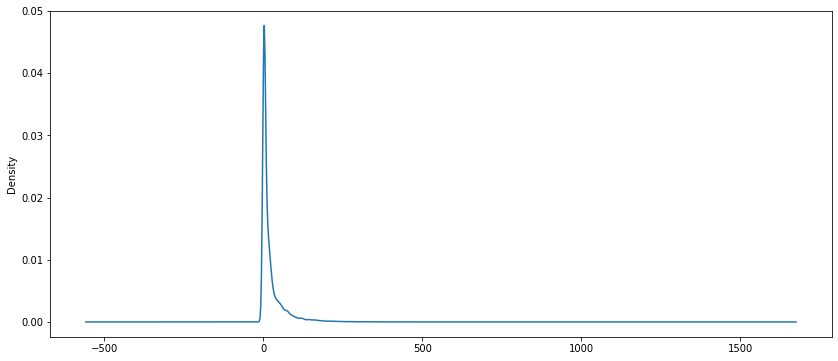

In [ ]:
sales.Revenue_per_Age.plot(kind="density", figsize=(14,6))

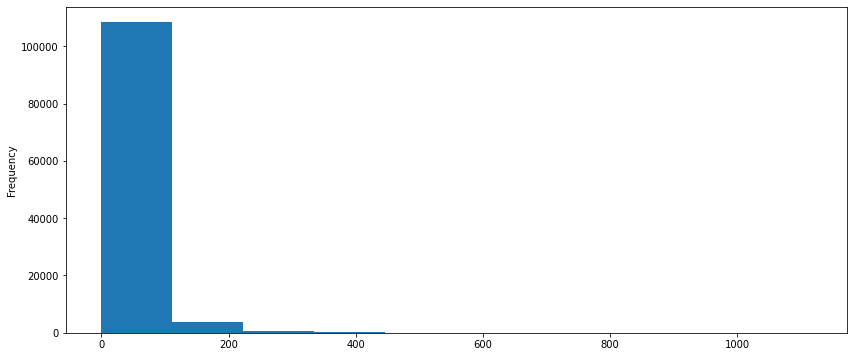

In [ ]:
sales.Revenue_per_Age.plot(kind="hist", figsize=(14,6))

## Add a new column Calculated_Cost column

use formula

            *Calculated_Cost = Order_Quantity X Cost*

In [ ]:
sales['Calculated_Cost'] = sales.Order_Quantity * sales.Unit_Cost
sales.Calculated_Cost.head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [ ]:
(sales.Calculated_Cost != sales.Cost).sum()

0

### We can see the relationship between Cost and Profit using scatter plot:

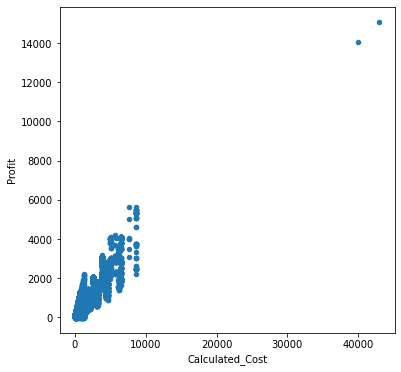

In [ ]:
sales.plot(kind="scatter", x="Calculated_Cost", y="Profit", figsize=(6,6))

### Add and calculate a new Calculated_Revenue column

Use the formula

                  Calculated_Revenue = Profit + Cost

In [ ]:
sales['Calculated_Revenue'] = sales.Profit + sales.Cost
sales.Calculated_Revenue.head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [ ]:
(sales.Calculated_Revenue != sales.Revenue).sum()

0

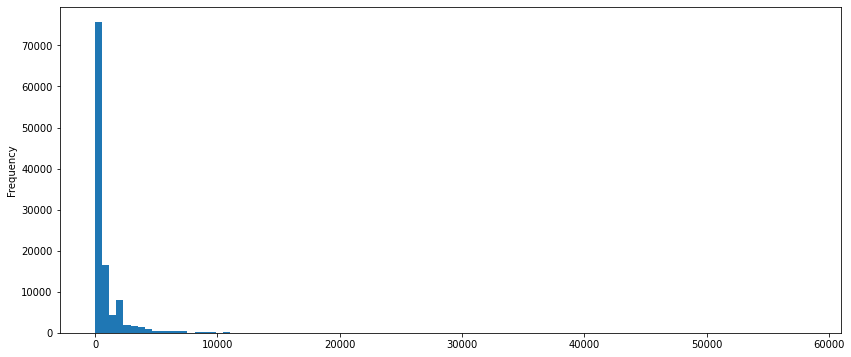

In [ ]:
sales.Revenue.plot(kind="hist", bins=100, figsize=(14,6))

## Modify all Unit_Price values adding 3% tax to them

In [ ]:
sales.Unit_Price *= 1.03

In [ ]:
sales.Unit_Price.tail(10)

113026    65.92
113027    65.92
113028    65.92
113029    65.92
113030    65.92
113031    65.92
113032    65.92
113033    65.92
113034    65.92
113035    65.92
Name: Unit_Price, dtype: float64

### Selection & Indexing

In [ ]:
# get all the sales made in the state of Kentucky
sales.loc[sales.State == "Kentucky"]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


**Get the mean revenue of the Adults (35-64) sales group**

In [ ]:
sales[sales.Age_Group == "Adults (35-64)"].Revenue.mean()
sales.loc[sales.Age_Group == "Adults (35-64)", "Revenue"].mean()

762.8287654055604

**How many records belong to the Age Group Youth (<25) or Adults (35-64) ?**

In [ ]:
sales.loc[(sales.Age_Group == "Youth (<25)")|(sales.Age_Group == "Adults (35-64)")].shape[0]

73652

**Get the mean revenue of the sales group Adults (35-64) in United States**

In [ ]:
sales.loc[(sales.Age_Group == "Adults (35-64)")&(sales.Country == "United States")].Revenue.mean()

726.7260473588342

**Increase the revenue by 10% to every sale made in France**

In [ ]:
sales.loc[sales.Country == "France", "Revenue"] *= 1.1

In [ ]:
# sales.loc[sales.Country == "France"].Revenue *= 1.1
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
sales.loc[sales.Country == "France"].Revenue

50         865.7
51         865.7
52        3252.7
53        3136.1
60         688.6
           ...  
112979    1892.0
113000     405.9
113001     473.0
113034    1386.0
113035    1327.7
Name: Revenue, Length: 10998, dtype: float64

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("sakila.db")

df = pd.read_sql('''
  SELECT rental.rental_id, rental.rental_date, rental.return_date,
  customer.last_name as customer_lastname,
  store.store_id,
  city.city as rental_store_city,
  film.title as film_title, film.rental_duration as film_rental_duration,
  film.rental_rate as film_rental_rate, film.replacement_cost as file_replacement_cost,
  film.rating as film_rating
  FROM rental 
  INNER JOIN customer ON rental.customer_id == customer.customer_id
  INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
  INNER JOIN store ON inventory.store_id == store.store_id
  INNER JOIN address ON store.address_id == address.address_id
  INNER JOIN city ON address.city_id == city.city_id
  INNER JOIN film ON inventory.film_id == film.film_id
  ;
''', conn, index_col= 'rental_id', parse_dates=["rental_date", "return_date"])




In [ ]:
df.head()
#df.shape

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,file_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   file_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,file_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


# Numerical analysis and Visualization

We'll analyze the file_rental_rate column

In [ ]:
df.film_rental_rate.describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [ ]:
df.film_rental_rate.mean()

2.9426302667662574

In [ ]:
df.film_rental_rate.median()

2.99

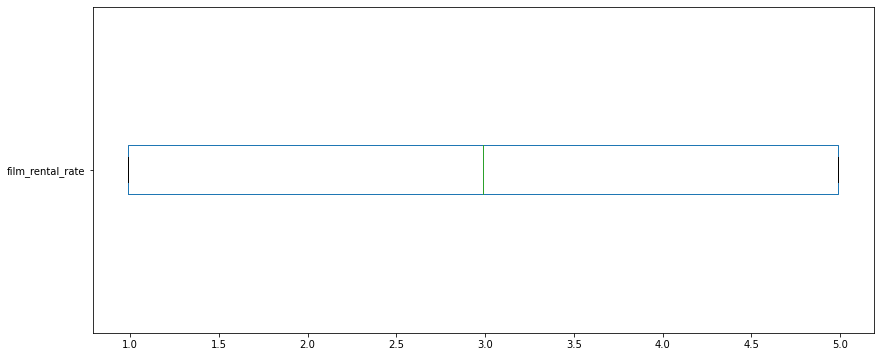

In [ ]:
df.film_rental_rate.plot(kind="box", vert=False, figsize=(14, 6))

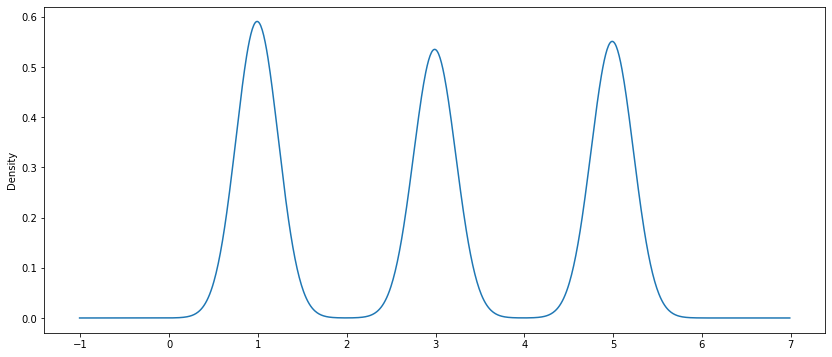

In [ ]:
df.film_rental_rate.plot(kind="density", figsize=(14,6))

In [ ]:
df.film_rental_rate.value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

Text(0, 0.5, 'Number of Rentals')

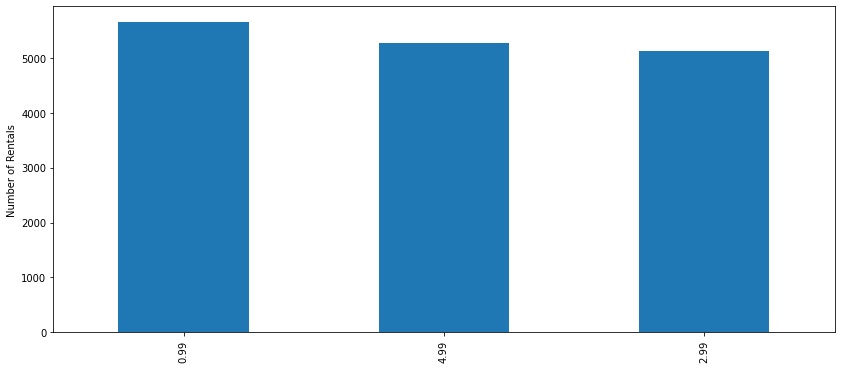

In [ ]:
ax = df.film_rental_rate.value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of Rentals")

# Categorical analysis and visualization

We'll analyse the rental_store_city columns

In [ ]:
df.rental_store_city.value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

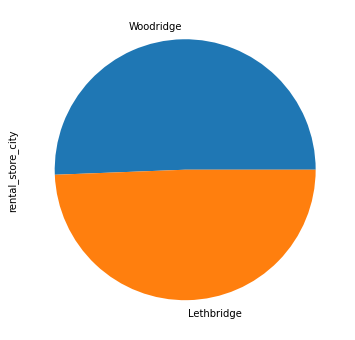

In [ ]:
df.rental_store_city.value_counts().plot(kind="pie", figsize=(6,6))

Text(0, 0.5, 'Number of rental')

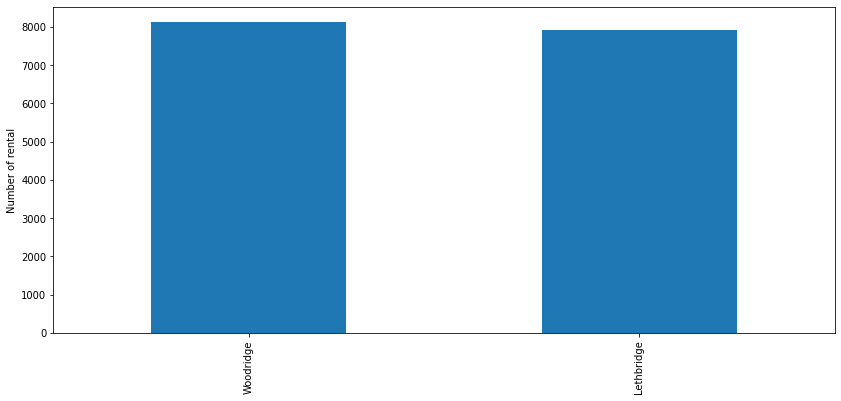

In [ ]:
ax = df.rental_store_city.value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of rental")

# Column wrangling

We can also create new column or modify existing ones.

## Add and calculate a new rental_rate_return column

We want to know the rental rate of return of each film. To do that we'll use this formula.


rental_rate_return = film_rental_rate/film_replacement_cost*100

In [ ]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [ ]:
#df.rename(columns={'file_replacement_cost':'film_replacement_cost'}, inplace=True)
df['rental_gain_return'] = (df.film_rental_rate/df.film_replacement_cost)*100

In [ ]:
df.rental_gain_return.head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

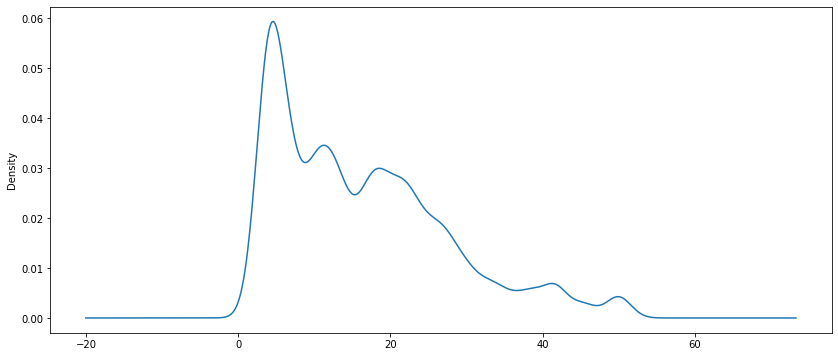

In [ ]:
df.rental_gain_return.plot(kind="density", figsize=(14, 6))

In [ ]:
round(df.rental_gain_return.mean(), 2)

16.34

In [ ]:
round(df.rental_gain_return.median(), 2)

13.6

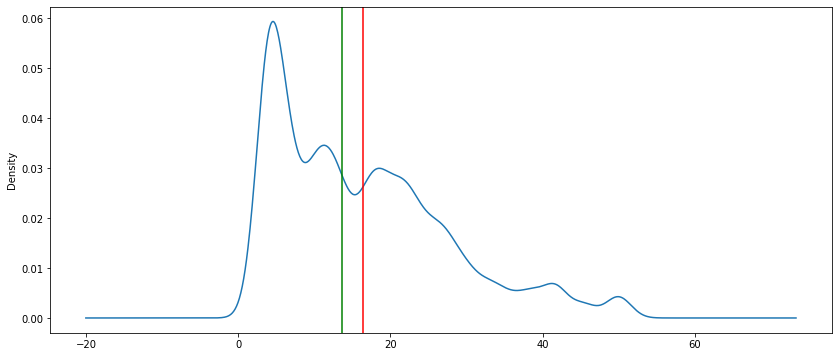

In [ ]:
ax = df.rental_gain_return.plot(kind="density", figsize=(14, 6))
ax.axvline(df.rental_gain_return.mean(), color="red")
ax.axvline(df.rental_gain_return.median(), color="green")

Each rental represent 13.6% of film cost

so 7.35 rental required to recover film market price (film_replacement_price)

In [ ]:
df.film_title.value_counts().mean()

16.747390396659707

# Selection & Indexing

## Get the rental records of the customers with lastname "HANSEN"

In [ ]:
df.loc[df.customer_lastname == "HANSEN"]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


### Create a list of all the films with the highest replacement cost

In [ ]:
df.loc[df.film_replacement_cost == df.film_replacement_cost.max(), "film_title"].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

### How many PG and PG-13 rating films were rented?

In [ ]:
df.loc[(df.film_rating == 'PG')|(df.film_rating == 'PG-13'), "film_title"].shape[0]

6797